# Homework 2

In this homework you will be performing some analysis with entity extraction. In particular, you will be looking at the Reuters corpus and trying to construct entity profiles of persons, organizations, and locations. This will require you to iterate through the documents in the Reuters corpus, parse them appropriately, extract entities, and then store the entities along with some surrounding text. Additionally, you will be looking for mechanisms to identify potential relationships between persons and locations.

Throughout this you will need to use NLTK to access the corpus. At the same time, you will need to use an entity extraction system. You can choose to use either NLTK or Spacy. I would strongly suggest using Spacy for the entity extraction portion of this assignment.

The basic idea is to build a knowledge base around the entities you will extract in the Reuters corpus. Normally, this would be a first step to trying to model such things as entity resolution across documents. You could also use this as a first step to analyzing the sentiment towards particular entities. For example, people expressing dissatistfaction at a restaurant or brand.

Follow the below steps and read the comments carefully on the types of tasks your code will need to do.

I would expect that some of you might be able to reuse parts of this code for your project...

## Step 1) Import necessary libraries 

In [5]:
# This will be the corpus we work from
from nltk.corpus import reuters

In [18]:
pip install -U spacy

Requirement already up-to-date: spacy in /Users/Matteo/opt/anaconda3/lib/python3.7/site-packages (2.2.3)
Note: you may need to restart the kernel to use updated packages.


In [57]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [10]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/Matteo/opt/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/Users/Matteo/opt/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [11]:
!python -m spacy validate

✔ Loaded compatibility table

====================== Installed models (spaCy v2.1.8) ======================
ℹ spaCy installation:
/Users/Matteo/opt/anaconda3/lib/python3.7/site-packages/spacy

TYPE      NAME             MODEL            VERSION                            
package   en-core-web-sm   en_core_web_sm   2.1.0   ✔
link      en               en_core_web_sm   2.1.0   ✔



In [9]:
!python -m pip install wordcloud

     |████████████████████████████████| 163kB 5.8MB/s eta 0:00:01


In [217]:
# Import Spacy as a default entity recognizer.
import spacy
# note, the model load can be odd. In some instances your model might have the full name or the short name here.
# if you run into issues here, check the spacy model page at https://spacy.io/usage/models
nlp = spacy.load('en')

In [218]:
# libraries needed
import itertools
from nltk.corpus import reuters
import nltk.data
from nltk.tokenize import TreebankWordTokenizer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Step 2) Function to extract the entity, document id, and relevant sentence text from the input

In [219]:
def extract_entities(doc_id, doc_text):
    analyzed_doc = nlp(doc_text)
    
    # these dictionaries will include all the persons, organizations, and locations you find in a document.
    # You will need to add each person or location you encounter in the document to them
    # for the key you can use the text of the entity, for the value you will want to use the document_id and the
    # text of the sentence one challenge could be that an entity might occur multiple times in the document, 
    # thus the value should really be a document id and a list of the text of the sentences ( or something such as that)
    doc_persons = {}
    doc_organizations = {}
    doc_locations = {}
    
    doc_persons_clean = {}
    doc_organizations_clean = {}
    doc_locations_clean = {}
    
    for entity in analyzed_doc.ents:
        if entity.text.strip() != "":
            # The .label_ property will provide information on the type of entity tagged
            # print(" -> ", entity.label_)
            # The .text property will display the actual text of the entity in the text
            # print("->", entity.text.strip(), "<-")
            # You can also access the sentence that the entity is contained in by using the .sent property
            # inside the sentence you can then use the .text property
            # print("->", entity.sent.text, "<-")
            
            # one way to represent the document id and the sentence text would be with a tuple
            # thus, you could do:
            relevant_sentence = (doc_id, entity.sent.text)
            
            # add the relevant document id and sentence to the entity record
            if entity.label_ == 'PERSON':
                #if entity.text.strip() not in doc_persons.keys():
                doc_persons[entity.text.strip()]=relevant_sentence
#                 else:
#                     doc_persons[entity.text.strip()].append(relevant_sentence)
            
            if entity.label_ == 'ORG':
#                 if entity.text.strip() not in doc_organizations.keys():
                doc_organizations[entity.text.strip()]=relevant_sentence
#                 else:
#                     doc_organizations[entity.text.strip()].append(relevant_sentence)
                
            if entity.label_ == 'GPE':
#                 if entity.text.strip() not in doc_locations.keys():
                doc_locations[entity.text.strip()]=relevant_sentence
#                 else:
#                     doc_locations[entity.text.strip()].append(relevant_sentence)

    #doc_persons_clean = names_resolution(doc_persons)     
    #doc_locations_clean = names_resolution(doc_locations)
        
    return doc_persons, doc_organizations, doc_locations
        

## Step 3) Adjust the following code to run the document entity extraction function
## Also, add the entity records you are constructing to your master list of entities
## Note: for the full subission run across all the Reuters documents

In [230]:
num_docs = len(reuters.fileids())
#  this has a large number of files... 
# you might wish to limit the number of documents you use while developing your technique 
# ex. reuters.fileids()[0:25]

# these two dictionaries will incorporate all the referneces to 
combined_persons = {}
combined_organizations = {}
combined_locations = {}

# this will only iterate over the first 25 documents, for the real submission you will need to run across all documents
for doc_id in reuters.fileids()[:500]: 
    # this doc_text variable will give you a text version of the news article. This could be tokenized.
    persons, organizations, locations = extract_entities(doc_id, reuters.open(doc_id).read())
#     print('\n')
#     print("Persons: ", persons)
#     print('\n')
#     print("Organizations: ", organizations)
#     print('\n')
#     print("Locations: ", locations)
    # you will need to write something here to put the persons and locations found in a document into the 
    # combined_persons, combined_organizations, and combined_locations dictionaries.
    # here you will need to consider how to extend the values already in the dictionaries
    # maybe something like:
    for person, text in persons.items():
         if person not in combined_persons.keys():
                combined_persons[person] = text
    
    # orgs
    for org, text in organizations.items():
         if org not in combined_organizations.keys():
                combined_organizations[org] = text
                
    # locations
    for location, text in locations.items():
         if location not in combined_locations.keys():
                combined_locations[location] = text

# print('\n')
# print("Persons: ", combined_persons)
# print('\n')
# print("Organizations: ", combined_organizations)
# print('\n')
# print("Locations: ", combined_locations)

    #         --- add a person key to the combined persons list
    #     now here you can add the person's document ids and sentence texts to the dictionary value


## Step 4) Fill in the following method to look through the content of an entity dictionary to determine the most popular based on number of mentions

In [231]:
# now that we have the text associated with the entities, 
# you will want to focus on the 500 top entities in each category
# Identify the top 500 entities by the count of their occurrences
def find_most_popular_entities(entity_dictionary):
    # sort through the entities in the dictionary by the number of sentences

    sorted(entity_dictionary.items(), key=lambda key:len(entity_dictionary.values()), reverse=True)
    
    list_of_dictionary_keys_with_most_mentions = []
    for keys in entity_dictionary.keys():
        list_of_dictionary_keys_with_most_mentions.append(keys)
    
    return list_of_dictionary_keys_with_most_mentions[:500]


## Step 5) Now invoke your top entity mention finder

In [232]:
# simply get the top persons and locations
top_persons = find_most_popular_entities(combined_persons)
top_organizations = find_most_popular_entities(combined_organizations)
top_locations = find_most_popular_entities(combined_locations)

## Step 6) Analyze the most popular entities to determine what words they most frequently occur with

In [233]:
# finally, now find the most frequent tokens associated with the entities
person_most_popular_terms = {}
for person in top_persons:
    # fill this dictionary with all the words in the context of the person entity
    top_terms_pperson = {}
    for key, text in combined_persons.items():
        
        punkt_sentences = sentence_tokenizer.tokenize(text[1])
        sentences_words = [treebank_tokenizer.tokenize(sentence) for sentence in punkt_sentences]
        all_tokens = [word for sentence in sentences_words for word in sentence]
        all_tokens = [word.lower() for word in all_tokens if word.isalpha()]
        stop_words = nltk.corpus.stopwords.words('english')
        all_tokens = [w for w in all_tokens if w not in stop_words]
        
        person_token_dictionary = {}

        for t in all_tokens:
            if t not in person_token_dictionary.keys():
                person_token_dictionary[t] = 1
            else:
                person_token_dictionary[t] += 1

        sort_tok = sorted(person_token_dictionary.items(), key=lambda x:x[1], reverse=True)

        most_freq = [p[0] for p in sort_tok if p[1] > 1]
        
        top_terms_pperson[key] = most_freq
        
    for key, values in top_terms_pperson.items():
        if key != person:
            continue
        person_most_popular_terms[key] = values   
        

In [234]:
# finally, now find the most frequent tokens associated with the entities
organization_most_popular_terms = {}
for org in top_organizations:
    # fill this dictionary with all the words in the context of the person entity
    top_terms_porg = {}
    for key, text in combined_organizations.items():
        
        punkt_sentences = sentence_tokenizer.tokenize(text[1])
        sentences_words = [treebank_tokenizer.tokenize(sentence) for sentence in punkt_sentences]
        all_tokens = [word for sentence in sentences_words for word in sentence]
        all_tokens = [word.lower() for word in all_tokens if word.isalpha()]
        stop_words = nltk.corpus.stopwords.words('english')
        all_tokens = [w for w in all_tokens if w not in stop_words]
        
        org_token_dictionary = {}

        for t in all_tokens:
            if t not in org_token_dictionary.keys():
                org_token_dictionary[t] = 1
            else:
                org_token_dictionary[t] += 1

        sort_tok = sorted(org_token_dictionary.items(), key=lambda x:x[1], reverse=True)

        most_freq = [p[0] for p in sort_tok if p[1] > 1]
        
        top_terms_porg[key] = most_freq
        
    for key, values in top_terms_porg.items():
        if key != org:
            continue
        organization_most_popular_terms[key] = values   


In [264]:
# finally, now find the most frequent tokens associated with the entities
location_most_popular_terms = {}
for loc in top_locations:
    # fill this dictionary with all the words in the context of the person entity
    top_terms_ploc = {}
    for key, text in combined_locations.items():
        
        punkt_sentences = sentence_tokenizer.tokenize(text[1])
        sentences_words = [treebank_tokenizer.tokenize(sentence) for sentence in punkt_sentences]
        all_tokens = [word for sentence in sentences_words for word in sentence]
        all_tokens = [word.lower() for word in all_tokens if word.isalpha()]
        stop_words = nltk.corpus.stopwords.words('english')
        all_tokens = [w for w in all_tokens if w not in stop_words]
        
        loc_token_dictionary = {}

        for t in all_tokens:
            if t not in loc_token_dictionary.keys():
                loc_token_dictionary[t] = 1
            else:
                loc_token_dictionary[t] += 1

        sort_tok = sorted(loc_token_dictionary.items(), key=lambda x:x[1], reverse=True)

        most_freq = [p[0] for p in sort_tok if p[1] > 1]
        
        top_terms_ploc[key] = most_freq
        
    for key, values in top_terms_ploc.items():
        if key != loc:
            continue
        location_most_popular_terms[key] = values   


## Step 7) Present your results of the most popular entities and their associated terms

In [268]:
def wordcloud(freq_entities):
    wordcloud = WordCloud(
        background_color='white',
        width=1000,
        height=500
    ).generate_from_frequencies(dict(freq_entities))

    plt.figure(figsize=(14, 14), facecolor=None)
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

In [237]:
for k, v in person_most_popular_terms.items():
    if len(v) != 0:
        print("Person: ", k)
        print("tokens: ", v)
        print('\n')

Person:  Tom
  Murtha
tokens:  ['tariffs']


Person:  Michael Smith
tokens:  ['deputy', 'trade']


Person:  Janunary
tokens:  ['billion']


Person:  Paian
  Nainggolan
tokens:  ['commodity', 'exchange']


Person:  Saleh
tokens:  ['rubber']


Person:  FOB
tokens:  ['mln']


Person:  Subroto
tokens:  ['said']


Person:  Mutsuki Kato
tokens:  ['open', 'market']


Person:  Richard Lyng
tokens:  ['japan']


Person:  Daniel Amstutz
tokens:  ['one']


Person:  Kim Mahn-je
tokens:  ['south', 'korea', 'slow', 'trade', 'surplus']


Person:  Kim
tokens:  ['surplus']


Person:  Whim Creek
tokens:  ['hold', 'pct', 'lt', 'nl']


Person:  Forrest Gold
tokens:  ['gold']


Person:  Bjoern Sejerstad
tokens:  ['citibank', 'norway', 'banking']


Person:  Vieille Montagne
tokens:  ['mln', 'franc', 'net']


Person:  Ramon Diaz
tokens:  ['government']


Person:  Alan Bond's
tokens:  ['bond']


Person:  Jacksons Ltd
tokens:  ['ltd', 'australian', 'lt']


Person:  Bob Johnston
tokens:  ['yen']


Person:  Sheik

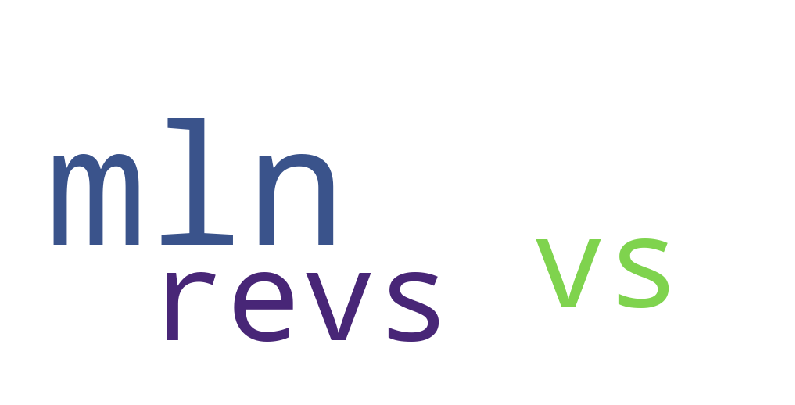

In [269]:
wordcloud(person_token_dictionary)

In [239]:
for k, v in organization_most_popular_terms.items():
    if len(v) != 0:
        print("Organization: ", k)
        print("tokens: ", v)
        print('\n')

Organization:  &lt;James
tokens:  ['tariffs']


Organization:  Makoto
  Kuroda
tokens:  ['deputy', 'trade']


Organization:  International Trade and
  Industry
tokens:  ['deputy', 'trade']


Organization:  the China Daily
tokens:  ['seven', 'china']


Organization:  The Ministry of International Trade and
  Industry
tokens:  ['ministry', 'energy']


Organization:  the
  Agency
tokens:  ['energy']


Organization:  Natural Resources and Energy
tokens:  ['energy']


Organization:  the Business Economics Department
tokens:  ['trade', 'deficit', 'first', 'quarter', 'billion']


Organization:  Hasrul Harahap
tokens:  ['sharply']


Organization:  NSW
tokens:  ['action', 'nsw']


Organization:  Labour Council
tokens:  ['action', 'nsw']


Organization:  The Indonesian Commodity Exchange
tokens:  ['commodity', 'exchange']


Organization:  the U.S.
  Department of Agriculture
tokens:  ['department']


Organization:  U.S. Dlrs
tokens:  ['department']


Organization:  Goodall
tokens:  ['pct']


Org

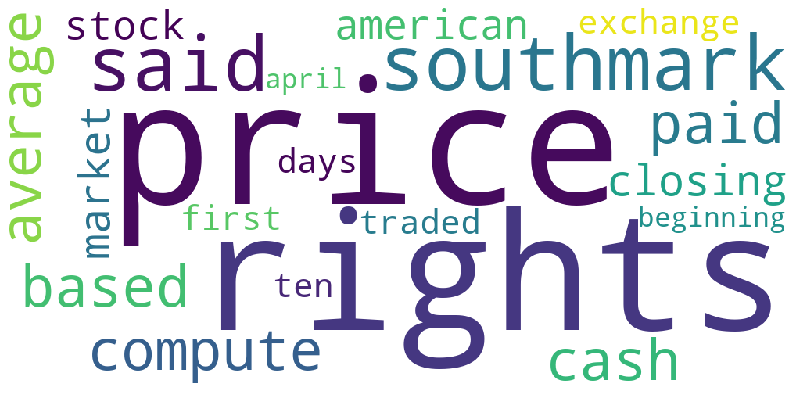

In [240]:
wordcloud(org_token_dictionary)

In [241]:
for k, v in location_most_popular_terms.items():
    if len(v) != 0:
        print("Location: ", k)
        print("tokens: ", v)
        print('\n')

Location:  U.S.
tokens:  ['deputy', 'trade']


Location:  Japan
tokens:  ['deputy', 'trade']


Location:  Tokyo
tokens:  ['tariffs']


Location:  South Korea's
tokens:  ['trade']


Location:  South Korea
tokens:  ['billion', 'dlrs']


Location:  Australia
tokens:  ['australia', 'exports']


Location:  Washington
tokens:  ['deputy', 'trade']


Location:  Indonesia
tokens:  ['palm', 'oil']


Location:  Mexico
tokens:  ['encourage']


Location:  Brazil
tokens:  ['imports']


Location:  North Yemen
tokens:  ['north', 'yemen', 'sugar', 'buying', 'tender']


Location:  San
  Miguel
tokens:  ['government']


Location:  Kuwait
tokens:  ['billion', 'dlrs']


Location:  Manila
tokens:  ['ucpb', 'shares']


Location:  United
  States
tokens:  ['shares']


Location:  Queensland
tokens:  ['queensland']


Location:  Bundaberg
tokens:  ['queensland']


Location:  Fondiaria
tokens:  ['lt']


Location:  West Germany
tokens:  ['rate', 'inflation']


Location:  Paxar
tokens:  ['paxar', 'corp']


Location

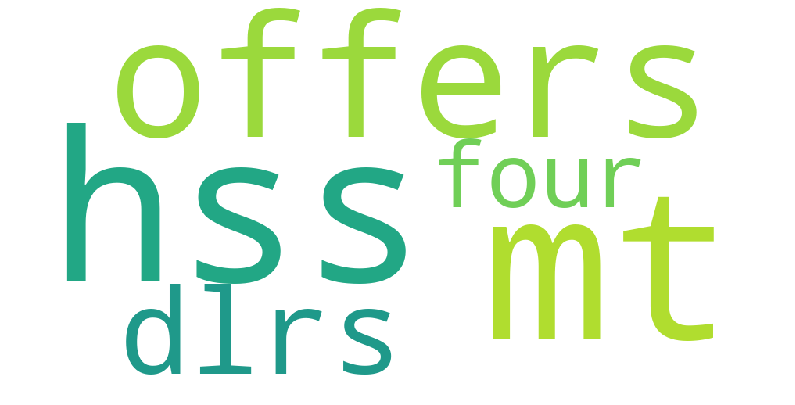

In [270]:
wordcloud(loc_token_dictionary)

## Extra Credit

There are several extra credit options for this assignment. 
* The first would be to determine which persons, organizations, and locations most frequently occur in the same sentences.
* Another task would be to attempt to resolve different forms of the same name for each person and location. For example, George Bush and Bush inside the same document.

## 1. Determine which entities co-occur in the same sentence

In [243]:
# co-occurences for relations among entities
def ent_relation(doc_id, doc_text):
    
    analyzed_doc = nlp(doc_text)
    
    doc_sent_entities = {}

    for sent in analyzed_doc.sents:
        sent_doc = sent.as_doc()
        count_entities = {}
        for entity in sent_doc.ents:
            if entity.text.strip() != "":
                if entity.label_ == "PERSON" or entity.label_ == "ORG" or entity.label_ == "GPE":
                    if entity.text.strip() not in count_entities.keys():
                        count_entities[entity.text.strip()] = 1
                    else:
                        count_entities[entity.text.strip()] += 1 
        sort_dic = sorted(count_entities.items(), key=lambda x:x[1], reverse=True)
        if len(sort_dic) > 1:
            doc_sent_entities[sent] = sort_dic
    return doc_sent_entities


In [244]:
combined_sents = {}

# Example for 50 docs
for doc_id in reuters.fileids()[0:50]: 
    #print(reuters.open(doc_id).read())
    dic_sents = ent_relation(doc_id, reuters.open(doc_id).read())
    
    for sent, value in dic_sents.items():
        if sent not in combined_sents.keys():
            combined_sents[sent] = value


In [245]:
# Display of co-occurence in sentences
counter = 0
for k, v in combined_sents.items():
    print('**************************')
    print("Sentence:", k)
    print("Entities:", v)
    print()
    counter += 1
    if counter == 25:
        break

**************************
Sentence: They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
      
Entities: [('U.S.', 2), ('Reuter', 1), ('Japan', 1)]

**************************
Sentence: The U.S. Has said it will impose 300 mln dlrs of tariffs on
  imports of Japanese electronics goods on April 17, in
  retaliation for Japan's alleged failure to stick to a pact not
  to sell semiconductors on world markets at below cost.
      
Entities: [('U.S.', 1), ('Japan', 1)]

**************************
Sentence: If the tariffs remain in place for any length of time
  beyond a few months it will mean the complete erosion of
  exports (of goods subject to tariffs) to the U.S.," said Tom
  Murtha, a stock analyst at the Tokyo office of broker &lt;James
  Capel and Co>.
      
Entities: [('U.S.', 1), ('Tom\n  Murtha', 1), ('Tokyo', 1), ('&lt;James', 1)]

**************

## 2. Applied (tentatively) a resolution function for different forms of same names 
#### As I was not able to count for multiple instances of same name and update keys, I have not (yet) included the function into step 2) as called within the extract_entities function

In [246]:
def names_resolution(entities_dictionary):
    entities_names = []
    for k in entities_dictionary.keys():
        entities_names.append(k)
    entities_sets = []
    for w in entities_names:
        entities_sets.append(set(w.split()))


    ind = list(itertools.combinations(range(len(entities_sets)), 2))

    for i, j in ind:
        l = entities_sets[i].intersection(entities_sets[j])
        if len(l) > 0:
            if len(entities_sets[i]) > len(entities_sets[j]):
                entities_sets[j] = entities_sets[i].union(entities_sets[j])
            elif len(entities_sets[j]) > len(entities_sets[i]):
                entities_sets[i] = entities_sets[i].union(entities_sets[j])


    right_names = []
    for w in entities_sets:
        right_names.append(' '.join(w))

    # changing the keys
    
    values = []
    for v in entities_dictionary.values():
        values.append(v)

    entities_dictionary_clean = dict(zip(right_names, values))
    return entities_dictionary_clean


In [247]:
# Example on persons dictionary for one document

for doc_id in reuters.fileids()[:1]: 
    persons, organizations, locations = extract_entities(doc_id, reuters.open(doc_id).read())
    clean_persons = names_resolution(persons)

# As mentioned, right now the function looses duplicates of the keys :/
for k, v in clean_persons.items():    
    print("Person:", k)
    print("Sentences:", v)
    print()

Person: Reuter
Sentences: ('test/14826', 'They told Reuter correspondents in Asian capitals a U.S.\n  Move against Japan might boost protectionist sentiment in the\n  U.S. And lead to curbs on American imports of their products.\n      ')

Person: Tom Murtha
Sentences: ('test/14826', 'If the tariffs remain in place for any length of time\n  beyond a few months it will mean the complete erosion of\n  exports (of goods subject to tariffs) to the U.S.," said Tom\n  Murtha, a stock analyst at the Tokyo office of broker &lt;James\n  Capel and Co>.\n      ')

Person: Sheen Paul
Sentences: ('test/14826', 'We must quickly open our markets, remove trade barriers and\n  cut import tariffs to allow imports of U.S. Products, if we\n  want to defuse problems from possible U.S. Retaliation," said\n  Paul Sheen, chairman of textile exporters &lt;Taiwan')

Person: Mills Lawrence
Sentences: ('test/14826', 'That is a very short-term view," said Lawrence Mills,\n  director-general of the Federation of Ho